## pt파일 체크
- 최초 pretrained 파일의 클래스는 80개 ( COCO 데이터셋 학습)
- finetuned model 4가지 클래스 학습

dfl 뒷 단에서 클래스 갯수 차이로 weight parameter shape 차이가 생기는 것을 알 수 있습니다

In [4]:
import cv2
import torch
from ultralytics import YOLO

In [5]:
original_pt="C:/Users/용준/OneDrive - UOS/문서/카카오워크 받은 파일/yolov5lu.pt"
#wrong1="C:/Users/용준/OneDrive - UOS/문서/카카오워크 받은 파일/best_origin.pt"
wrong2="C:/Users/용준/OneDrive - UOS/문서/카카오워크 받은 파일/best.pt"


In [8]:
model_origin = torch.load(original_pt)
#model_wrong1= torch.load(wrong1)
model_wrong2= torch.load(wrong2)

In [55]:
#model = torch.hub.load('ultralytics/yolov5', 'custom', wrong1)

Using cache found in C:\Users\용준/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-6-29 Python-3.11.3 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 213 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [86]:
#model_get1=YOLO(wrong1)
#len(list(*model_get1.model.children()))

25

In [3]:
m1=model_origin["model"]
#m2=model_wrong1["model"]
m3=model_wrong2["model"]

NameError: name 'model_origin' is not defined

In [7]:
m3

NameError: name 'm3' is not defined

In [87]:
model_v8=YOLO()
len(list(*model_v8.model.children()))

23

In [80]:
print(model_v8.model)

DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
    

In [57]:
model_wrong1

{'epoch': -1,
 'best_fitness': None,
 'model': DetectionModel(
   (model): Sequential(
     (0): Conv(
       (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2), bias=False)
       (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
       (act): SiLU(inplace=True)
     )
     (1): Conv(
       (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
       (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
       (act): SiLU(inplace=True)
     )
     (2): C3(
       (cv1): Conv(
         (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
         (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
         (act): SiLU(inplace=True)
       )
       (cv2): Conv(
         (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
         (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_

In [58]:
model_wrong2

{'epoch': -1,
 'best_fitness': None,
 'model': DetectionModel(
   (model): Sequential(
     (0): Conv(
       (conv): Conv2d(3, 64, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2), bias=False)
       (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
       (act): SiLU(inplace=True)
     )
     (1): Conv(
       (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
       (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
       (act): SiLU(inplace=True)
     )
     (2): C3(
       (cv1): Conv(
         (conv): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
         (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
         (act): SiLU(inplace=True)
       )
       (cv2): Conv(
         (conv): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
         (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, tr

In [43]:
list1=[]
list2=[]
list3=[]
#list3=[]
#for name, param in m1.named_parameters():
#    list1.append((name,param.shape))
for name, param in m2.named_parameters():
    list2.append((name,param.shape))
for name, param in m3.named_parameters():
    list3.append((name,param.shape))

In [44]:
for i in range(len(list2)):
    if (list2[i]!=list3[i]):
        print(list2[i], list3[i])
    else:
        print("ok")

('model.0.conv.weight', torch.Size([32, 3, 6, 6])) ('model.0.conv.weight', torch.Size([64, 3, 6, 6]))
('model.0.bn.weight', torch.Size([32])) ('model.0.bn.weight', torch.Size([64]))
('model.0.bn.bias', torch.Size([32])) ('model.0.bn.bias', torch.Size([64]))
('model.1.conv.weight', torch.Size([64, 32, 3, 3])) ('model.1.conv.weight', torch.Size([128, 64, 3, 3]))
('model.1.bn.weight', torch.Size([64])) ('model.1.bn.weight', torch.Size([128]))
('model.1.bn.bias', torch.Size([64])) ('model.1.bn.bias', torch.Size([128]))
('model.2.cv1.conv.weight', torch.Size([32, 64, 1, 1])) ('model.2.cv1.conv.weight', torch.Size([64, 128, 1, 1]))
('model.2.cv1.bn.weight', torch.Size([32])) ('model.2.cv1.bn.weight', torch.Size([64]))
('model.2.cv1.bn.bias', torch.Size([32])) ('model.2.cv1.bn.bias', torch.Size([64]))
('model.2.cv2.conv.weight', torch.Size([32, 64, 1, 1])) ('model.2.cv2.conv.weight', torch.Size([64, 128, 1, 1]))
('model.2.cv2.bn.weight', torch.Size([32])) ('model.2.cv2.bn.weight', torch.Size(

In [11]:
infer_origin = YOLO(original_pt)
infer_wrong1=YOLO(wrong2)
infer_wrong1
#infer_wrong2=YOLO(wrong2)

## 학습한 모델 테스트

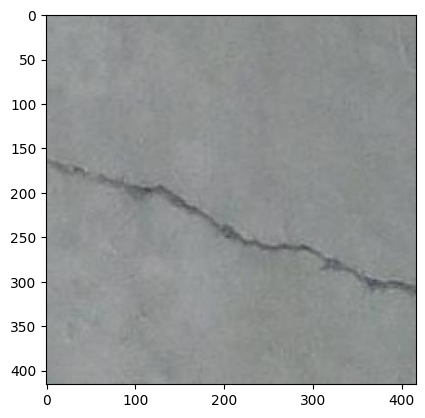

(416, 416, 3)

In [32]:
from PIL import Image
img_path='./datasets/box/relabeled_1/test/images/00022_jpg.rf.44d399285e592cb8fdcc60ac56eae904.jpg'
im1 = cv2.imread(img_path)  # cv2
im1=cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
from matplotlib import pyplot as plt
#im1=cv2.resize(im1,(640,640))
plt.imshow(im1)
plt.show()
im1.shape

In [12]:
result1=infer_origin(im1)


0: 640x640 (no detections), 1154.8ms
Speed: 23.0ms preprocess, 1154.8ms inference, 9.0ms postprocess per image at shape (1, 3, 640, 640)



0: 640x640 1 crack, 1734.2ms
Speed: 11.0ms preprocess, 1734.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


tensor([207.9005, 237.3647, 415.6010, 160.1884])


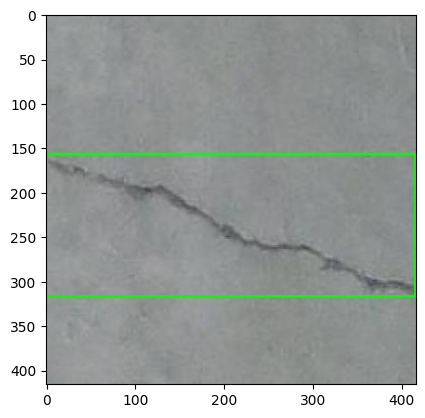

In [33]:
#im1 = cv2.imread('Concrete-Crack.jpg')  # cv2
#im1=cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
tensor1=torch.tensor(im1).permute(2,0,1)
tensor2=torch.tensor(im1).permute(2,0,1)
t3= torch.stack([tensor1,tensor2])
result2=infer_wrong1(im1)
output1=result2[0].boxes
xywh=output1.xywh
for item in xywh:
    print(item)
    center_x, center_y,width, height,  = rectangle= item
    # Calculate the top-left corner coordinates of the rectangle
    x = int(center_x - width / 2)
    y = int(center_y - height / 2)

    # Calculate the bottom-right corner coordinates of the rectangle
    x2 = int(center_x + width / 2)
    y2 = int(center_y + height / 2)

    # Draw the rectangle on the image
    cv2.rectangle(im1, (x, y), (x2, y2), (0, 255, 0), thickness=2)

plt.imshow(im1)
plt.show()

In [2]:
result3

NameError: name 'result3' is not defined

In [28]:
t3.shape

torch.Size([2, 3, 416, 416])

In [34]:
result3=infer_wrong1(t3)
result3[0]

1938.6ms


ultralytics.yolo.engine.results.Results object with attributes:

boxes: ultralytics.yolo.engine.results.Boxes object
keypoints: None
keys: ['boxes']
masks: None
names: {0: 'crack', 1: 'horizontal crack', 2: 'slanted', 3: 'vertical crack'}
orig_img: tensor([[[[150, 149, 148,  ..., 138, 139, 140],
          [151, 150, 149,  ..., 138, 139, 140],
          [152, 151, 150,  ..., 138, 139, 140],
          ...,
          [141, 141, 141,  ..., 144, 145, 146],
          [143, 142, 142,  ..., 142, 143, 143],
          [144, 143, 143,  ..., 140, 141, 141]],

         [[154, 153, 152,  ..., 140, 141, 142],
          [155, 154, 153,  ..., 140, 141, 142],
          [156, 155, 154,  ..., 140, 141, 142],
          ...,
          [150, 150, 150,  ..., 148, 149, 150],
          [152, 151, 151,  ..., 146, 147, 147],
          [153, 152, 152,  ..., 144, 145, 145]],

         [[155, 154, 153,  ..., 139, 140, 141],
          [156, 155, 154,  ..., 139, 140, 141],
          [157, 156, 155,  ..., 139, 140, 141

In [40]:
result3[0].boxes

WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.yolo.engine.results.Boxes object with attributes:

boxes: tensor([[-1.4423e-01,  1.5816e+02,  4.1578e+02,  3.1603e+02,  8.8557e-01,  0.0000e+00]])
cls: tensor([0.])
conf: tensor([0.8856])
data: tensor([[-1.4423e-01,  1.5816e+02,  4.1578e+02,  3.1603e+02,  8.8557e-01,  0.0000e+00]])
id: None
is_track: False
orig_shape: torch.Size([2, 3])
shape: torch.Size([1, 6])
xywh: tensor([[207.8177, 237.0994, 415.9239, 157.8696]])
xywhn: tensor([[ 69.2726, 118.5497, 138.6413,  78.9348]])
xyxy: tensor([[-1.4423e-01,  1.5816e+02,  4.1578e+02,  3.1603e+02]])
xyxyn: tensor([[-4.8075e-02,  7.9082e+01,  1.3859e+02,  1.5802e+02]])

In [15]:
im1 = cv2.imread('Concrete-Crack.jpg')  # cv2
im1=cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)

result3=infer_wrong1(im1)
result3[0].boxes
output2=result3[0].boxes
xywh=output2.xywh
for item in xywh:
    print(item)
    center_x, center_y,width, height,  = rectangle= item
    # Calculate the top-left corner coordinates of the rectangle
    x = int(center_x - width / 2)
    y = int(center_y - height / 2)

    # Calculate the bottom-right corner coordinates of the rectangle
    x2 = int(center_x + width / 2)
    y2 = int(center_y + height / 2)

    # Draw the rectangle on the image
    cv2.rectangle(im1, (x, y), (x2, y2), (0, 255, 0), thickness=2)

plt.imshow(im1)
plt.show()

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


## 펜 낙서 테스트

- 펜 낙서임이 명확함에도 크랙으로 인식하는 문제점 확인

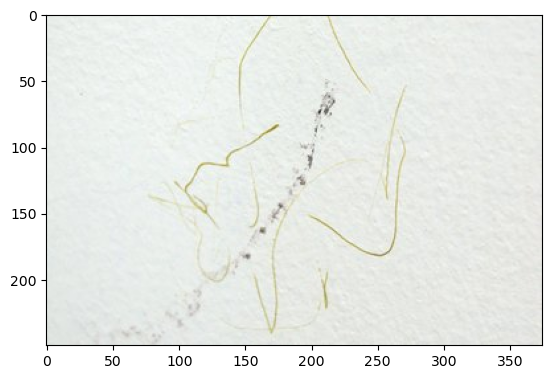

In [52]:
from PIL import Image
im1 = cv2.imread('pendrawing.jpg')  # cv2
im1=cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
from matplotlib import pyplot as plt
#im1=cv2.resize(im1,(640,640))
plt.imshow(im1)
plt.show()


0: 448x640 4 cracks, 794.1ms
Speed: 4.0ms preprocess, 794.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


tensor([136.9123, 120.0814,  78.6726,  80.4510])
tensor([226.9082,  28.2409,  34.3666,  56.2925])
tensor([238.3764, 137.8949,  74.3302,  96.0705])
tensor([157.6128,  42.2614,  29.5110,  84.5228])


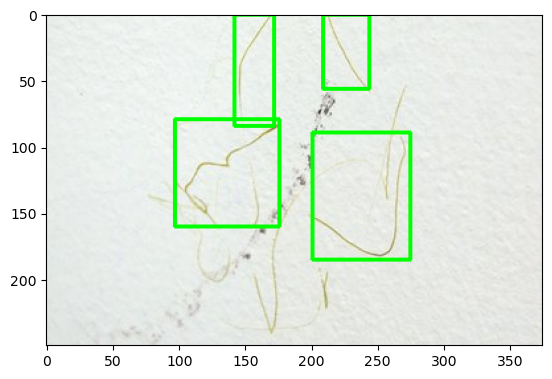

In [53]:
result_pen=infer_wrong2(im1)
output_pen=result_pen[0].boxes

xywh=output_pen.xywh
for item in xywh:
    print(item)
    center_x, center_y,width, height,  = rectangle= item
    # Calculate the top-left corner coordinates of the rectangle
    x = int(center_x - width / 2)
    y = int(center_y - height / 2)

    # Calculate the bottom-right corner coordinates of the rectangle
    x2 = int(center_x + width / 2)
    y2 = int(center_y + height / 2)

    # Draw the rectangle on the image
    cv2.rectangle(im1, (x, y), (x2, y2), (0, 255, 0), thickness=2)

plt.imshow(im1)
plt.show()